# Time Series Decomposition and Trend–Seasonality Analysis of Airline Passenger Demand

Airline passenger volume exhibits long-term growth, strong seasonality, and residual noise. Understanding and separating these components is required before any forecasting, anomaly detection, or capacity-planning model can be built.

This notebook performs classical time-series decomposition as a foundation step toward forecasting.

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

p = Path(Path.cwd()).resolve().parents[1]  / "datasets" / "international-airline-passengers.csv"
airline = pd.read_csv(p)
airline


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


### Data Pre-Process
* Loads monthly passenger counts
* Extracts year as a feature (unused later — improvement opportunity)
* Removes the final row (likely a malformed or summary row)

In [20]:
airline['Year'] = airline['Month'].apply(lambda x: x.split("-")[0])
airline = airline.iloc[:-1]



### Visualization

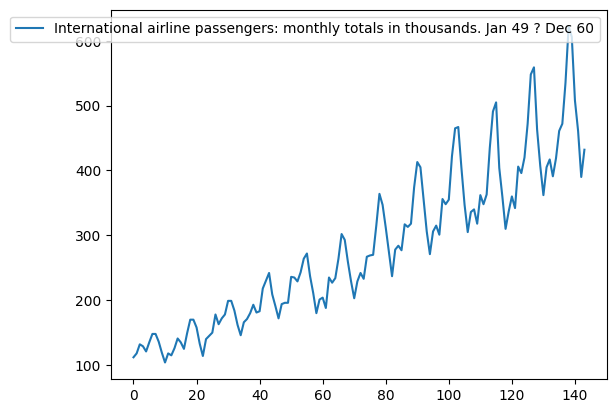

In [21]:
# airline = airline['Year'].astype(int)
airline.plot()
plt.show()

**Note :**
* Upward trend
* Increasing amplitude of seasonal cycles
* Non-constant variance (heteroscedasticity)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(airline, model='additive')
# result.plot()
# plt.show()